In [99]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd



In [100]:
#df_CDFS = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-19-23\df_AlConCD554.csv")

df_CDFS = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDCA.csv")
# df_CDFS = pd.read_csv('/workspaces/codespaces-jupyter/Final Machine/Interpolated LIMS/df_CDOH.csv')


In [101]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [102]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = [#'Date', 
                   #'FFC55553' ,'LC55555', 'FC55003', 'LC55557', 'FFC55555','LC55553', 
                   'TI55021', 'TC55555'
                   
                   ]

# Create a new DataFrame without the excluded columnsd
df_CDFS = df_CDFS.drop(columns=exclude_columns)

In [103]:
df_CDFS.describe()

,Butanol,425 %Al,TC55552,DI55102,FC55569,DI55152,FC55576,TI55017,FC42428,AYC55580,LC55555,TI55023,FFC55553,FC55555,FC55009,LC55557,LC55553,FC55003,FFC55555
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,5.669200e+04,56692.000000,56692.000000,56692.000000,56692.000000
mean,10.159097,6.102568,167.848708,0.929183,6542.683482,0.948213,423.616848,186.704144,34949.282507,11.190763,59.583652,218.923414,0.983235,27838.228893,8.642095e+02,69.335227,63.743198,5943.587725,0.774375
std,10.766912,0.307167,15.014702,0.066439,380.329468,0.043248,260.435270,9.778964,5665.289174,4.140405,10.709861,4.063504,0.056070,3535.683915,5.951287e+02,3.271572,6.403442,836.963231,0.021944
min,0.010000,4.573810,119.869000,0.794535,5096.080000,0.820425,0.000548,159.702000,14573.800000,0.000862,27.970000,206.472000,0.265390,14214.900000,3.150000e-18,59.038000,43.548000,2925.430000,0.694477
25%,3.725195,5.969493,156.235000,0.889793,6295.522500,0.917749,244.604000,179.370000,31670.025000,9.382740,49.938100,215.731000,0.959998,26770.325000,4.091148e+02,66.227375,61.246825,5425.580000,0.759903
50%,5.920780,6.120565,170.625000,0.938533,6529.010000,0.942326,379.134000,185.770500,37037.650000,10.709550,61.884700,218.255500,0.988710,28947.000000,8.416325e+02,69.966300,65.277550,5963.340000,0.778141
75%,11.642100,6.267622,179.313000,0.979955,6767.337500,0.974824,617.744000,193.388250,39151.750000,12.928750,68.106400,221.765000,1.010652,30036.300000,1.317453e+03,71.768800,67.964225,6506.837500,0.789695
max,60.346700,7.571230,207.426000,1.068230,8014.950000,1.065410,1206.820000,212.051000,49372.900000,23.835600,85.261600,232.208000,1.475490,34638.100000,2.655410e+03,79.508200,82.753500,8973.580000,0.853283


In [104]:
column_counts = df_CDFS.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)

19


In [105]:

# # List of columns to exclude to run XGboost feature selection
# exclude_columns = ["Date", "Decanol"]

# # Temporarily save the excluded columns
# temp_exclude = df_CDFS1[exclude_columns]

# # Create a new DataFrame without the excluded columnsd
# df_CDFS = df_CDFS1.drop(columns=exclude_columns)



In [106]:
# # List of columns to exclude
# columns_to_exclude = [
#     'FC52018_1dAvg', 'FC55003_1dAvg', 'FC55009_1dAvg', 'FC55102_1dAvg',
#     'FC55152_1dAvg', 'FC55552_1dAvg', 'FC55569_1dAvg', 'FC55576_1dAvg',
#     'FFC55553_1dAvg', 'FFC55555_1dAvg', 'FYC55553_1dAvg', 'LC52572_1dAvg',
#     'LC55553_1dAvg', 'LC55555_1dAvg', 'LC55557_1dAvg', 'LC55568_1dAvg',
#     'LC90366_1dAvg', 'LC90368_1dAvg', 'TC52015_1dAvg', 'TC55552_1dAvg',
#     'TC55553_1dAvg', 'TC55555_1dAvg', 'TC55566_1dAvg', 'TI40050_1dAvg',
#     'PI55004_1dAvg', 'PI55020_1dAvg', 'TI52014_1dAvg', 'VI52558B_1dAvg',
#     'PI55004', 'PI55020', 'PI55560', 'TI40050', 'FC55009'
# ]

# # Filter columns based on exclusion list
# columns_to_include = [col for col in df_CDFS_noStr.columns if col not in columns_to_exclude]

# # Create a new DataFrame with included columns
# df_CDFS_noAvg = df_CDFS_noStr[columns_to_include]

# # Print descriptive statistics for df_CDFS
# print(df_CDFS_noAvg.describe())



In [107]:
# print(df_CDFS_noAvg.columns)

# # Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_CDFS_noAvg.to_csv('df_CDFS_noAvg.csv', index=False)


In [108]:
X = df_CDFS.drop('Butanol', axis=1)  # Replace 'target' with the actual name of your target column
y = df_CDFS['Butanol']  # Replace 'target' with the actual name of your target column


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 30.921767569041588


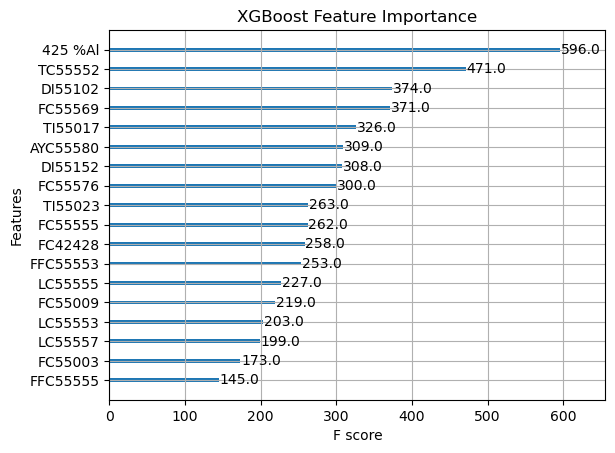

In [112]:
xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()


In [113]:

# Extract feature importances from the model
feature_importances = model.get_booster().get_score(importance_type="weight")

# Convert the dictionary to a DataFrame and sort by importance
df_importance = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)



df_importance.to_csv('FScore_on_Butanol.csv', index=False)

In [114]:
num_columns = df_importance.shape[0]
print("Number of rows:", num_columns)

Number of rows: 18


In [115]:
# Display the DataFrame
df_importance

,Feature,Importance
0,425 %Al,596.0
1,TC55552,471.0
2,DI55102,374.0
3,FC55569,371.0
6,TI55017,326.0
8,AYC55580,309.0
4,DI55152,308.0
5,FC55576,300.0
10,TI55023,263.0
12,FC55555,262.0


In [117]:
# # Extract the feature names you want to keep from df_importance
# features_to_keep = df_importance['Feature'].tolist()

# # Filter df_CDFS using these features
# df_CDFS = df_CDFS[features_to_keep]

# # Add back the excluded columns to df_CDFS
# df_CDFS = pd.concat([y, df_CDFS, temp_exclude], axis=1)

In [118]:
# Extract feature importances from the model
feature_importances = model.get_booster().get_score(importance_type="weight")

# Convert the dictionary to a DataFrame and sort by importance
df_importance = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Capture all the feature names before filtering
all_features = set(df_importance['Feature'])

# Define a threshold for feature importance
threshold = 100  # Adjust this threshold as needed

# Prompt to remove columns with importance values below the threshold
print(f"Removing columns with importance values below {threshold}...")

# Filter the DataFrame to keep only columns with importance values above the threshold
df_importance = df_importance[df_importance['Importance'] >= threshold]

# Capture the feature names after filtering
remaining_features = set(df_importance['Feature'])

# Find the features that were dropped
dropped_features = all_features - remaining_features

# Print the dropped features
print(f"Columns dropped due to low importance: {', '.join(dropped_features)}")
print(f"Total number of columns dropped: {len(dropped_features)}")

# Save the filtered DataFrame to a CSV file
df_importance.to_csv('filtered_FScore_on_Butanol.csv', index=False)

print("Filtered data saved to 'filtered_FScore_on_Butanol.csv'")


Removing columns with importance values below 100...
Columns dropped due to low importance: 
Total number of columns dropped: 0
Filtered data saved to 'filtered_FScore_on_Butanol.csv'


# REPLACE NECESSARY FEATURES

In [ ]:
# # Check if 'FFC5555' is missing in df_CDFS columns
# if 'FFC5555' not in df_CDFS.columns:
#     # Add the 'FFC5555' column from df_CDFS1 to df_CDFS
#     df_CDFS['FFC5555'] = df_CDFS1['FC55555']


In [ ]:
# Saving only the column names of df_CDFS to a .csv file
with open('df_CDFSI_columns.csv', 'w') as file:
    for column in df_CDFS.columns:
        file.write(f"{column}\n")


In [119]:
column_counts = df_CDFS.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)

column_counts = df_CDFS.columns.value_counts()
total_counts = column_counts.sum()
print(total_counts)


18
18
